**Desenvolvido Por:**  
_Matheus Gama Costa_  
 
  
**Importando bibliotecas**  
Nessa parte as bibliotecas básicas utilizadas para a construção do código são importada.  
Foram utilizadas _numpy_ para trabalharmos com vetores e a parte matemática, _math_ para alguns operadores matemáticos, _matplotlib_ para plotar os gráficos, e a _signal_ do _scipy_ para operações com sinais.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import signal

**EX 1**  
Gerando as ondas senoidais de 17 Hz é ruido aleatório, com 1 e 5 Vpp respectivamente. 
Aplicando a autocorrelação para detecção de sinais na presença de ruído:  
* x1= senóide 1Vpp,17Hz.  
* x2= ruído aleatório 5Vpp  
* x(t) = x1(t) + x2(t)

In [2]:
##############################################################
######## Inicialização de variavei para criar o sinal ########
##############################################################
f_x1 = 17  # frequência do tom, Hz
A_x1 = 1    # amplitude
#f_x2 = 17 #frequencia em Hz
A_x2 = 2.5 # valor pico a pico em V
nivelDC =0
fs = 1000 # frequência de amostragem, Hz
T = 2      # duração em segundos
##############################################################
####Função para criação de sinais senoidais e ruido branco####
##############################################################
def fit_sin(type_s, A, f1=0):
    
    N = fs * T # número total de amostras
    n = np.arange(N) # índice das amostras
    t = n/fs         # índice da escala de tempo
    if type_s == 's':
        s = A * np.sin(2*np.pi*(f1)*t) # amostras do tom
    elif type_s == 'w_n':
        np.random.seed(0)
        s = np.random.randn(N)*A
        
    return s, t
##############################################################
###################### criando os sianis #####################
##############################################################
sinal_x1, n = fit_sin('s', A_x1, f_x1)
sinal_x2, n = fit_sin('w_n', A_x2)
#Constituição do sinal ruidoso
signal_x_t = sinal_x1+sinal_x2

**Plotando o sinal de 17Hz e com ruido**

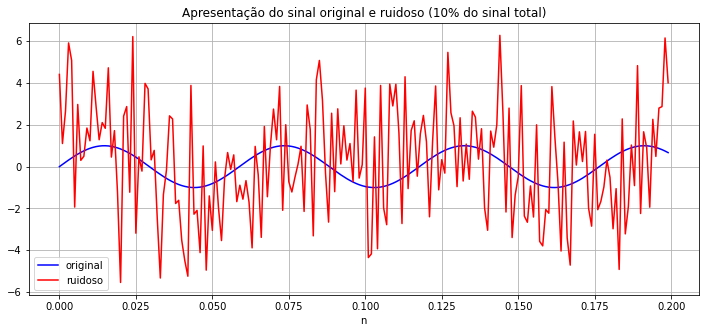

In [4]:
ind = np.arange(0, int(len(signal_x_t)/10))#define o plot até 10% do sinal
plt.figure(figsize=(12,5))#cria a figura no tamanho definido
plt.plot(n[ind], sinal_x1[ind], 'b', n[ind], signal_x_t[ind], 'r')#plota o sinal sem e com ruido
plt.legend(('original', 'ruidoso'), loc='best')#legenda do sinal
plt.xlabel('n')#definição do eixo x
plt.title('Apresentação do sinal original e ruidoso (10% do sinal total)')#título do gráfico
plt.grid()#mostra o grid
plt.show()#mostra o gráfico

**Função de autocorrelação**

**A função de autocorrelação foi implementada seguindo a seguinte equação**  
  
![autocorrelation_function](autocor.png)  
  
A autocorrelação é utilizada como estratégia para extrair caractristicas de um sinal na presença de ruido. A seguir conseguimos extrair o comportamento senoidal de 17 Hz do sinal ruizoso criado.

In [20]:
##############################################################
############ Montagem da Função de Autocorrelação ############
##############################################################
def auto_corr(signal_ACC):
    N = len(signal_ACC) #extraindo o tamanho do vetor
    y = np.zeros(N) # criando um vetor para receber os valores de autocorrelação
    for k in range(N):
        y[k] = np.sum(signal_ACC[k:N]*signal_ACC[0:N-k]) #fazendo um shift circular e o somatório

    y = y/np.max(y) # normalizando a saida

    plt.figure(figsize=(12,5))#cria a figura no tamanho definido
    plt.plot(y, )
    plt.scatter(np.arange(N), y, color='red')
    plt.title('autocorrelação')
    plt.ylabel('$y(k)$', fontsize=18)
    plt.xlabel('$k$', fontsize=18)
    plt.grid()
    plt.axis('tight')
    plt.show()
    return y

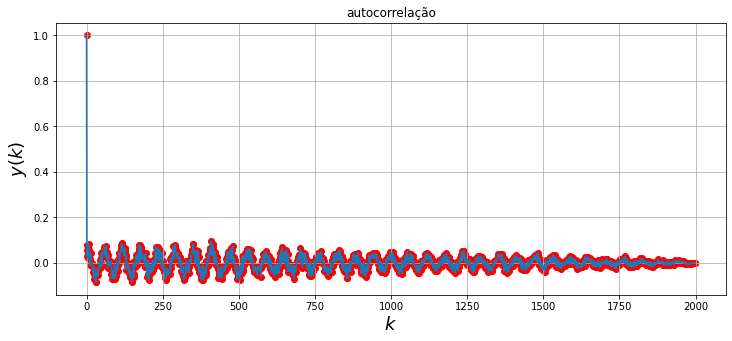

In [21]:
##############################################################
################## Aplicando a autocorelação #################
##############################################################
c = auto_corr(signal_x_t)

A seguir é apresentado uma outra maneira de se calcular a autocorrelação

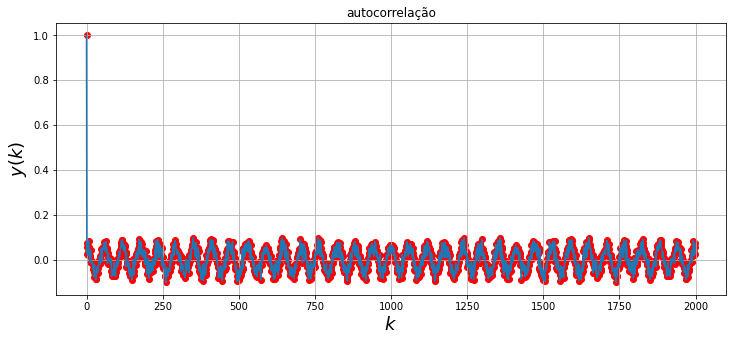

In [22]:
##############################################################
################ outra forma de autocorrelação ###############
##############################################################
ASD = np.append(signal_x_t, signal_x_t)
AC = np.zeros(len(ASD))
s = len(ASD)
for k in range(int(s/2)):
    sum = 0
    for n in range(int(s/2)):
        sum = sum + (ASD[n]*ASD[n + k])

    AC[k] = AC[k] + sum

AC = AC[0:len(signal_x_t)]/np.max(AC)
plt.figure(figsize=(12,5))#cria a figura no tamanho definido
plt.plot(AC)
plt.scatter(np.arange(len(AC)), AC, color='red')
plt.title('autocorrelação')
plt.ylabel('$y(k)$', fontsize=18)
plt.xlabel('$k$', fontsize=18)
plt.grid()
plt.axis('tight')
plt.show()

**O python possui uma biblioteca estátistica que também calcula a autocorrelação de um sinal. A seguir segue o resultado da autocorelação obtida com a função plot_acf da biblioteca statsmodels.**

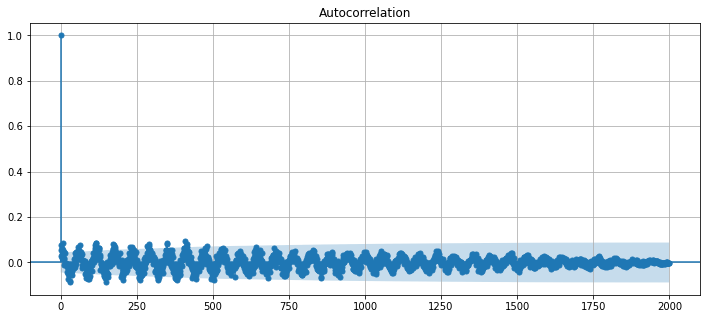

In [23]:
##############################################################
############# autocorrelation plot of time series ############
##############################################################
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,5))#cria a figura no tamanho definido
ax1 = plt.subplot()
plot_acf(signal_x_t, ax = ax1, lags=1999)
plt.grid()
plt.show()

**Podemos ver que o resultado encontrado é similar ao calculado com a função de autocorelação proposta. Desse modo, podemos dizer que a função proposta atingiu o objetivo.**

Calculando a convolução digital da seguinte sequênciade dados x(t) com a resposta ao impulso do sistema h(t).  
* x(t) = exp(-0,5.t); 0< t < 32T; T=1  
* h(t)=[0 1,5 0,75 0,375 0,1875 0,09375 0,046875 0,0234375]  

**Convolução - Seja uma sequência discreta x(n) ou x[n] ou xn. Seja um sistema linear invariante no tempo cuja resposta ao impulso é h(n). A saída desse sistema, y(n), dá-se pela convolução entre x(n) e h(n):**  

**y(n)=h(n)∗x(n)**

**A operação é comutativa:**

**y(n)=x(n)∗h(n)**

**Graficamente:**  
   
![Graph_convolution](graph_convolution.png)  
  
**Explicitamente, a computação das amostras de saída dá-se pela expressão da convolução discreta:**  
  
![convolution_formula](convolution.png)  
  
**Filtragem - Quando h(n) corresponde à resposta ao impulso de um filtro digital, a convolução corresponde a um processo de filtragem e a saída desse processo pode ser obtida por:**

In [29]:
##############################################################
############ Implementação da função de Convolução ###########
##############################################################
def convolve(x, h):
    xLen = len(x)# pegando o tamanho do vetor
    hLen = len(h)# ||             ||     ||
    if xLen == 0 or hLen == 0: #retornando convolução vazia para vetores de tamanho 0
        return None 

    totalLength = xLen + hLen - 1 #pegando o tamanho total do vetor de convolução
    y = np.zeros(totalLength) #criando o vetor de convolução 
    
    for n in range(totalLength):
        yn = 0
        k = max(0, n + 1 - xLen)
        j = n - k
        while k < hLen and j >= 0:
            yn += x[j] * h[k] #realizando a multiplicação de convolução
            j -= 1 #deslocando n
            k += 1 #deslocando i
        y[n] = yn
    return y

#### Utilizando a função anterior, podemos calcular a convolução para o sinal proposto no exercicio 2 da seguinte maneira:

In [31]:
##############################################################
############## Criando as definições do Enuciado #############
##############################################################
T = 1 #periodo de amostragem
n = np.arange(32*T) # índice das amostras
t = n         # índice da escala de tempo
x_t = np.zeros(len(t)) 

for a in range(len(t)):
    x_t[a] = math.exp((-0.5)*t[a]) #montagem do sinal proposto
    
h_t = np.array([0, 1.5, 0.75, 0.375, 0.1875, 0.09375, 0.046875, 0.0234375]) #resposta ao impulso

s_c = convolve(x_t, h_t) #aplicando a convolução

#### O resultado da convolução anterior pode ser observada no gráfico a seguir.

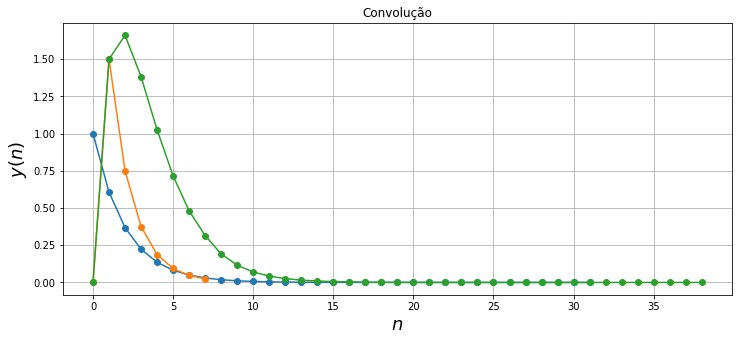

In [32]:
plt.figure(figsize=(12,5))#cria a figura no tamanho definido
plt.plot(x_t, '-o')
plt.plot(h_t, '-o')
plt.plot(s_c, '-o')
plt.title('Convolução')
plt.ylabel('$y(n)$', fontsize=18)
plt.xlabel('$n$', fontsize=18)
plt.grid()
plt.axis('tight')
plt.show()

Gráfico da resposta de frequênciado filtro FIR aplicado ao seguinte sinal:  .  
 * S = sin(2.pi.f1.t)+sin(2.pi.f2.t)+sin(2.pi.f3.t), onde:  
   * f1= 750Hz;  
   * f2= 2500Hz;  
   * f3= 3250Hz.  

In [33]:
##############################################################
######## Implementando a função do filtro passa baixas #######
##############################################################
def l_p_filter(N, fc):
    h = np.zeros(N)
    
    for i in range(int(N/2)): #como o filtro é simétrico será calculado o filtro até a metade do vetor
        if i == 0:
            h[i] = fc*2 #filtro para a posição 0
        
        elif i != 0:
            h[i] = 2*fc*(np.sin(2*np.pi*i*fc)/(2*np.pi*i*fc)) #calculo do filtro demais posições
            
    h = np.append(np.flip(h),h) # como o filtro é simétrico copiando o valor calculado e atribuindo a parte final do filtro
    return h[int(len(h)*0.25) : int(len(h)*0.75)]

In [34]:
##############################################################
############### Implementação da janela Hanning ##############
##############################################################
def Hanning_window(TW_norm):
    N = round(3.3/TW_norm) #calculando o numero de posições da janela a partir da frequencia BW
    h_w = np.zeros(N) 
    for i in range(int(N/2)):
        h_w[i] = 0.5 + (0.5 * np.cos((2*np.pi*i)/N)) #calculando a janela hanning para metade do vetor pois ela é simetrica
        
    h_w = np.append(np.flip(h_w), h_w) # atribuindo os valores calculados as posições finais por conta da simetria
            
    return h_w[int(len(h_w)*0.25) : int(len(h_w)*0.75)], N

In [35]:
##############################################################
############## Montando o filtro PB com a janela #############
##############################################################
def FIR_Window(TW, fc, WINDOW = 'hamming'):
    
    if WINDOW == 'hamming':
        h_w, N_w = Hanning_window(TW) #utilizando a função para criar a janela
        h_n = l_p_filter(N_w, fc)#usando a função para cria o filtro
        FIR = h_w * h_n #multiplicando a hanela e o filtro
            
    return FIR #retornando os coeficientes do filtro

In [36]:
##############################################################
############## Criando as definições do Enuciado #############
##############################################################
#passband_frequency 
f_cut = 1500
Transition_width = 500 #frequencia de transição
Stopband_attenuation = 53 #atenuação de banda de paradadb
#Sampling_frequency 
fs = 8000
TW_norm = Transition_width/fs
fc_norm = (f_cut+(Transition_width)/2)/fs #frequência de corte normalizada adisionada da frequencia de transição
# geração de sinal
f_x1 = 750  # frequência do tom, Hz
A_x1 = 1    # amplitude
f_x2 = 2500 #frequencia em Hz
A_x2 = 1 # valor pico a pico em V
f_x3 = 3250 #frequencia em Hz
A_x3 = 1 # valor pico a pico em V
T = 0.01      # duração em segundos
##############################################################
###################### Criando os sinais #####################
##############################################################
sinal_x1, n = fit_sin('s', A_x1, f_x1)
sinal_x2, n = fit_sin('s', A_x2, f_x2)
sinal_x3, n = fit_sin('s', A_x3, f_x3)
s = sinal_x1 + sinal_x2 + sinal_x3

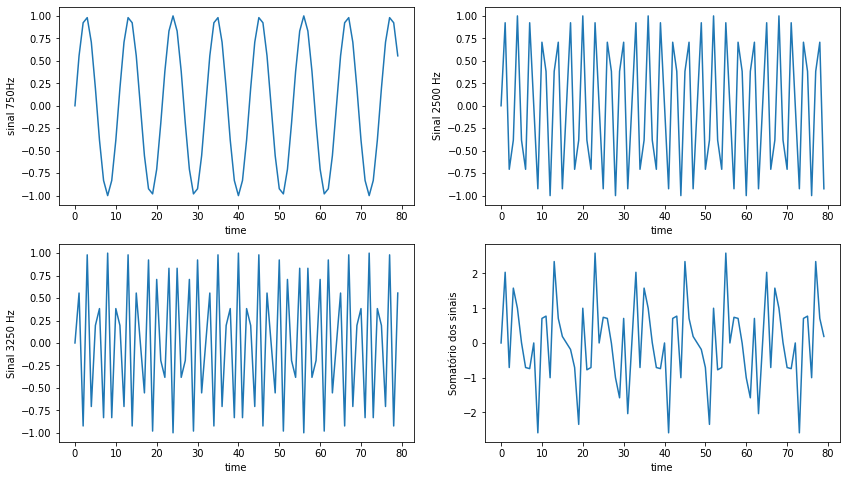

In [37]:
##############################################################
###################### Plotando os Sinais ####################
##############################################################
plt.figure(figsize=(14,8))

plt.subplot(2,2, 1)
plt.plot(sinal_x1)
plt.xlabel('time')
plt.ylabel('sinal 750Hz')

plt.subplot(2, 2, 2)
plt.plot(sinal_x2)
plt.xlabel('time')
plt.ylabel('Sinal 2500 Hz')

plt.subplot(2,2, 3)
plt.plot(sinal_x3)
plt.xlabel('time')
plt.ylabel('Sinal 3250 Hz')

plt.subplot(2, 2, 4)
plt.plot(s)
plt.xlabel('time')
plt.ylabel('Somatório dos sinais')
plt.show()

Text(0.5, 0, 'Frequência (Hz)')

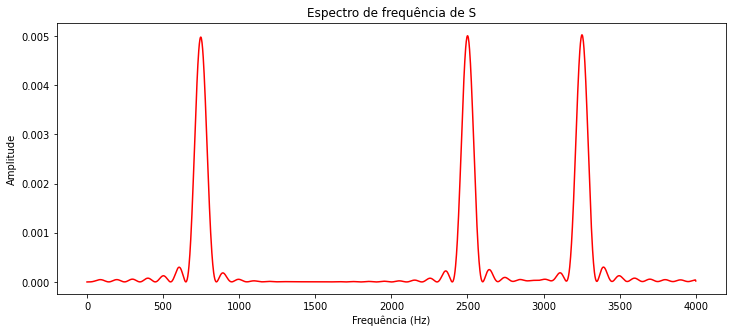

In [38]:
##############################################################
############ Apresentando o Espectro de Frequência ###########
##############################################################
f, Pxx = signal.periodogram(s, 8000, nfft=4096) # calculando o spectro de frequencia com a função periodogram
#plotando o espectro de frequencia
plt.figure(figsize=(12,5))#cria a figura no tamanho definido
plt.plot(f, Pxx, 'r')
plt.title('Espectro de frequência de S')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')

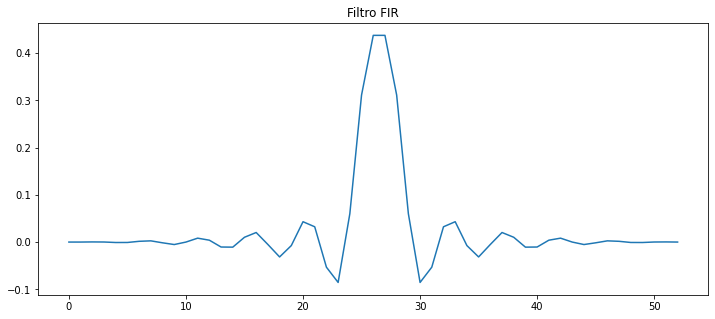

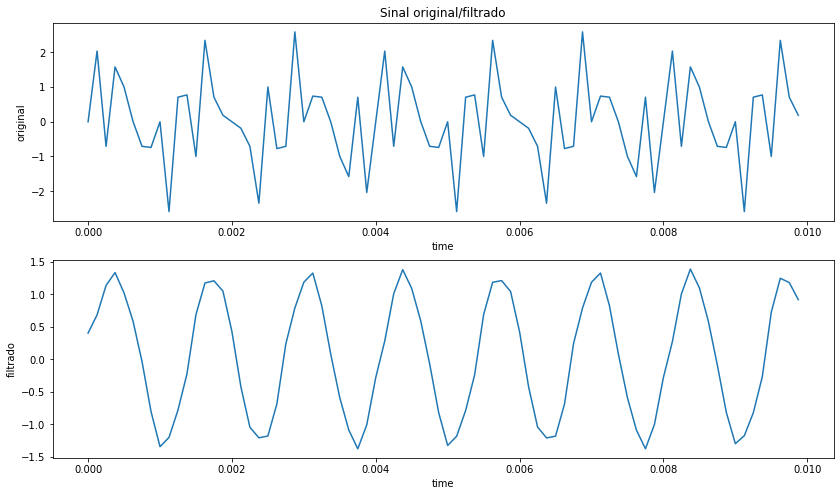

In [39]:
##############################################################
####### Mostrando o filtro criado e aplicando ao sinal #######
##############################################################
FIR_filter = FIR_Window(TW_norm, fc_norm)#calculando o filtro utilizando a função criada

#plotando o filtro
plt.figure(figsize=(12,5))
plt.plot(FIR_filter)
plt.title('Filtro FIR')
plt.show()

#plotando o sinal ruidoso e o filtrado
data = s
fir_response = convolve(data, FIR_filter)
plt.figure(figsize=(14,8))
plt.subplot(2, 1, 1)
plt.plot(n, data)
plt.xlabel('time')
plt.ylabel('original')
plt.title('Sinal original/filtrado')
plt.subplot(2, 1, 2)
plt.plot(n, fir_response[int(len(fir_response)*0.2) : int(len(fir_response)*0.80)+1])
plt.xlabel('time')
plt.ylabel('filtrado')

plt.show()

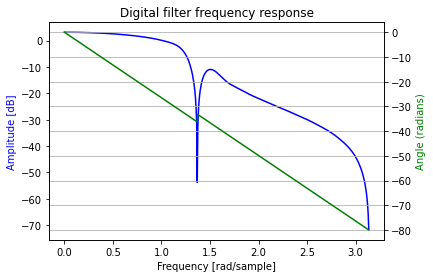

In [41]:
##############################################################
######### Resposta em frequência do filtro calculado #########
##############################################################
w, h = signal.freqz(FIR_filter) #calculando a resposta em frequencia 

#plotando a resposta em frequência
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot((w), 20 * np.log10(abs(h)), 'b')#para w wm HZ *159.155
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot((w), angles, 'g') #para w em HZ *159.155
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

#### Como pode ser observado o sinal aparentemente apresenta o resultado esperado de modo que a frequência de 750 Hz é a unica que permaneceu, Para confirmar isso vamos observar o espectro de frequencia do sinal filtrado

Text(0.5, 0, 'Frequência (Hz)')

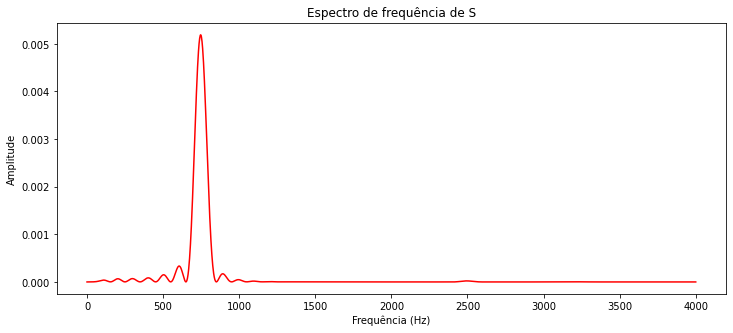

In [42]:
##############################################################
#### Apresentando o Espectro de Frequência sinal filtrado ####
##############################################################
f, Pxx = signal.periodogram(fir_response, 8000, nfft=4096) # calculando o spectro de frequencia com a função periodogram
#plotando o espectro de frequencia
plt.figure(figsize=(12,5))#cria a figura no tamanho definido
plt.plot(f, Pxx, 'r')
plt.title('Espectro de frequência de S')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')

#### O espectro de frequência mostra o que esperavamos apenas o componente predominante de 750 Hz continua de sinal

Usando o método da colocação de pólos e zeros no plano Z:(utilizando um sinal de ECG de 15 segundos amostrado 500Hz).
* Calcula-se os coeficientes do filtro notch.  
* Obten-se a função de transferência, a equação de diferenças e a representação em blocos para a seguinte especificação:  
 * (a) _Notch frequency_ 60Hz  
 * (b) 3dB _width of notch_ +-5Hz  
 * (c) _Samplingfrequency_ 1200Hz ou alguma frequênciamúltipla de 60Hz.  
* Então o sinal de ECG original é filtrado utilizando o filtro projetado.  

Text(0.5, 0, 'Frequência (Hz)')

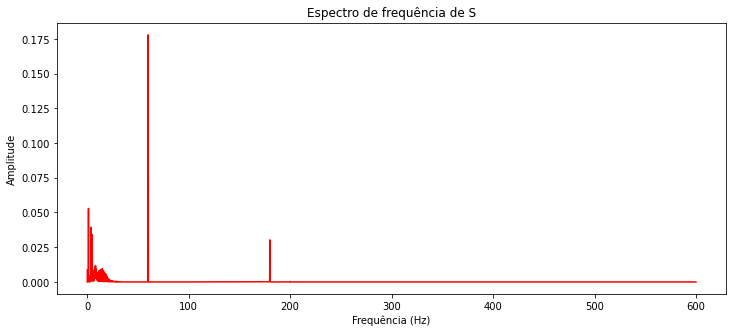

In [46]:
##############################################################
############## Criando as definições do Enuciado #############
##############################################################
#Sinal ECG
ecg = np.loadtxt("ECGtest03.txt")#carregando o sinal
ecg_col1 = ecg[:,0]
ecg_col2 = ecg[:,1] 
#Variáveis
fs = 500 #Frequência de amostragem do sinal
fs_interp = 1200 #Frequencia para o sinl interpolado
Intevalo_de_banda = 5 #BW
##############################################################
#################### Interpolação do Sinal ###################
##############################################################
ecg_interp = signal.resample(ecg_col2, int(ecg_col2.size/(fs/fs_interp)))
##############################################################
############### Espectro de Frequencia do Sinal ##############
##############################################################
f, Pxx = signal.periodogram(ecg_interp, 1200, nfft=5000)
plt.figure(figsize=(12,5))#cria a figura no tamanho definido
plt.plot(f, Pxx, 'r')
plt.title('Espectro de frequência de S')
plt.ylabel('Amplitude')
plt.xlabel('Frequência (Hz)')

In [47]:
##############################################################
########## Criando Função para calculo do filtro Noth ########
##############################################################
def filtro_notch(fc, fs_filt, Intevalo_de_banda):
    Ts = 1/fs_filt #período de amostragem    
    angulo = 360*fc/fs_filt*(np.pi/180); #ângulo    
    zero = 1 #raio dos zeros    
    polo = 1 - ((Intevalo_de_banda/fs_filt)*np.pi); #raio dos pólos    
    #montando o vetor dos zeros sendo eles complexos conjulgdos
    z = [complex((zero*np.cos(angulo)), (zero*np.sin(angulo))), 
         complex((zero*np.cos(-angulo)), (zero*np.sin(-angulo)))]
    #montando o vetor dos polos sendo eles complexos conjulgados
    p = [complex((polo*np.cos(angulo)), (polo*np.sin(angulo))), 
         complex((polo*np.cos(-angulo)), (polo*np.sin(-angulo)))]
    num,den = signal.zpk2tf(z,p,1)#numerador e denominador da FT de ganho unitário    

    return num,den # retornando o numerador e o denominador da função de transfer/ẽncia

/home/ieb-doc/.conda/envs/py36/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


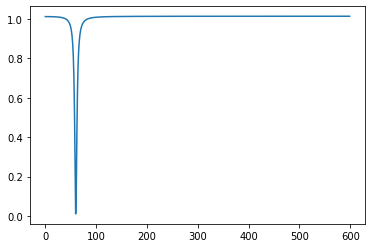

In [48]:
##############################################################
### Criando o filtro Noth 60 Hz a partir da função criada ####
##############################################################
fc = 60#Frequência de corte do filtro
num_60hz, den_60hz = filtro_notch(fc, fs_interp,Intevalo_de_banda)
#Plot da magnitude do filtro notch
f_n, h_n = signal.freqz(num_60hz, den_60hz, fs=fs_interp) 
plt.plot(f_n,h_n)

#### Para realizar a plotagem do polos e zeros no plano Z foi utilizado o código abaixo devidamente referenciado. Para o nosso uso ele foi adaptado.

In [53]:
##############################################################
################ Função para pĺotar no plano Z ###############
##############################################################
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)
    
    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

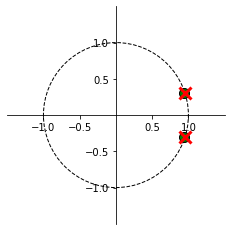

(array([0.93860722+0.30497197j, 0.93860722-0.30497197j]),
 array([0.95105652+0.30901699j, 0.95105652-0.30901699j]),
 1.0)

In [54]:
zplane(den_60hz,num_60hz)

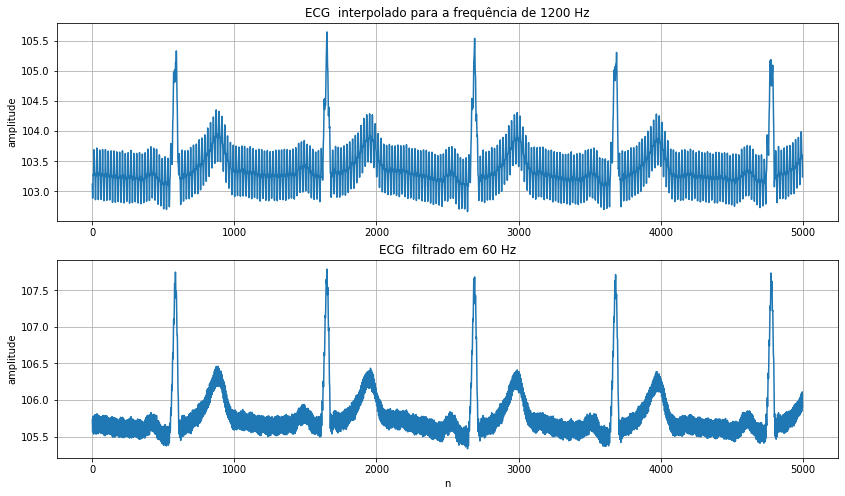

In [55]:
##############################################################
############# Aplicando o filtro de 60 Hz ao ECG #############
##############################################################
ecg_filt60hz = signal.filtfilt(num_60hz, den_60hz, ecg_interp, padtype = 'odd', 
                               padlen=3*(max(len(num_60hz),len(den_60hz))-1))
#Plot do sinal interpolado  em 1200 Hz
f, axarr = plt.subplots(2, 1, figsize=(14, 8))
axarr[0].plot(ecg_interp[100000:105000])
axarr[0].set_title('ECG  interpolado para a frequência de 1200 Hz')
axarr[0].set_ylabel('amplitude')
axarr[0].axis('tight')
axarr[0].grid()
#Plot do sinal filtrado em 60 Hz
axarr[1].plot(ecg_filt60hz[100000:105000])
axarr[1].set_title('ECG  filtrado em 60 Hz')
axarr[1].set_xlabel('n')
axarr[1].set_ylabel('amplitude')
axarr[1].axis('tight')
axarr[1].grid()

#### Como o sinal continuava ruidoso plotou-se a seguir o espectro de frequência para observar se havia alguma frequência muito dominanto fora do intervalo de interesse do ECG

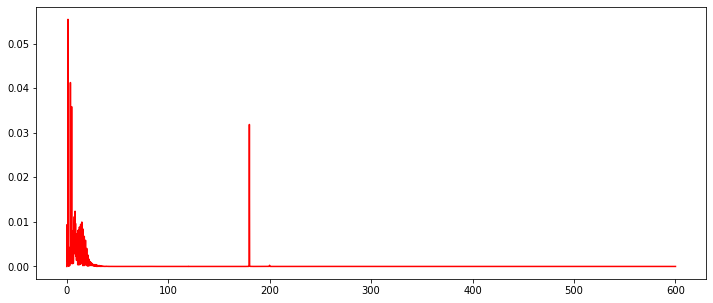

In [56]:
##############################################################
###### Espectro de frequência do sinal filtrado em 60 Hz #####
##############################################################
f_60hz, pxx_60hz = signal.periodogram(ecg_filt60hz, 1200, nfft = 5000)
plt.figure(figsize=(12,5))#cria a figura no tamanho definido
plt.plot(f_60hz, pxx_60hz, 'r')

#### Como pode ser visto a freqência de aproximadamente 180 Hz esta com uma alta energia presente, então iremos filtra-la a seguir

In [57]:
##############################################################
#### Criando filtro de 180 Hz usando a função noth cirada ####
##############################################################
fc_180 = 180#Frequência de corte do filtro
num_180hz, den_180hz = filtro_notch(fc_180, fs_interp, Intevalo_de_banda)

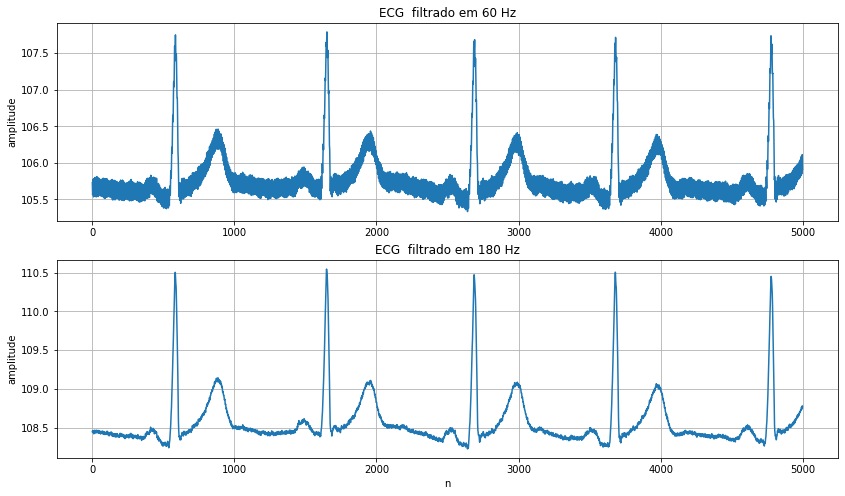

In [58]:
##############################################################
### Aplicando o filtro de 180 Hz no sinal filtrado de 60 Hz ##
##############################################################
#aplicando filtro 180
ecg_filt180hz = signal.filtfilt(num_180hz, den_180hz, ecg_filt60hz, padtype = 'odd', 
                               padlen=3*(max(len(num_180hz),len(den_180hz))-1))
#Plot do sinal filtrado em 60 Hz
f, axarr = plt.subplots(2, 1, figsize=(14, 8))
axarr[0].plot(ecg_filt60hz[100000:105000])
axarr[0].set_title('ECG  filtrado em 60 Hz')
axarr[0].set_ylabel('amplitude')
axarr[0].axis('tight')
axarr[0].grid()
#Plot do sinal filtrado em 180 Hz
axarr[1].plot(ecg_filt180hz[100000:105000])
axarr[1].set_title('ECG  filtrado em 180 Hz')
axarr[1].set_xlabel('n')
axarr[1].set_ylabel('amplitude')
axarr[1].axis('tight')
axarr[1].grid()

#### Como o sinal ainda apresentava ruido decidiu-se aplicar um filtro passabanda no intervalo de 0.1 a 50 Hz de modo a não interferir na frequêcia de interesse do ECG, para que o sinal ficasse mais limpo para futuras análises

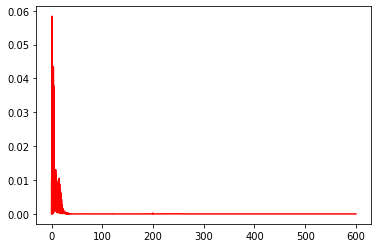

In [63]:
##############################################################
###### Espectro de frequência do sinal filtrado em 180 Hz ####
##############################################################
f_180hz, pxx_180hz = signal.periodogram(ecg_filt180hz, 1200, nfft = 5000)
plt.plot(f_180hz, pxx_180hz, 'r')

/home/ieb-doc/.conda/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/ieb-doc/.conda/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


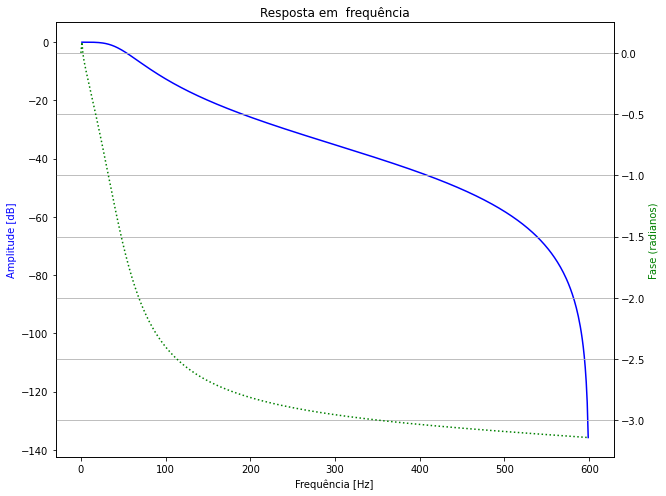

In [64]:
##############################################################
######### Criando o filtro passa banda de 0.1 - 50 Hz ########
##############################################################
# projeto do filtro, [b, a]
fs = 1200 # freq. amostragem
fb = 0.1  # freq. baixa/inferior
fa = 50  # freq. alta/superior
N = 2      # ordem/2
nyq = fs/2 #frequência de nyquist
b, a = signal.butter(N, [fb/nyq, fa/nyq], 'bandpass')#criando o filtro
W, H = signal.freqz(b, a) # calculando o espectro da frequência do filtro
##############################################################
#plotando espectro de frequencia do filtro passa banda criado#
##############################################################
F = W * fs/2/np.pi
fig = plt.figure(figsize=(10,8))
plt.title('Resposta em  frequência')
ax1 = fig.add_subplot(111)
plt.plot(F, 20 * np.log10(abs(H)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequência [Hz]')
ax2 = ax1.twinx()
fase = np.unwrap(np.angle(H))
plt.plot(F, fase, 'g:')
plt.ylabel('Fase (radianos)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

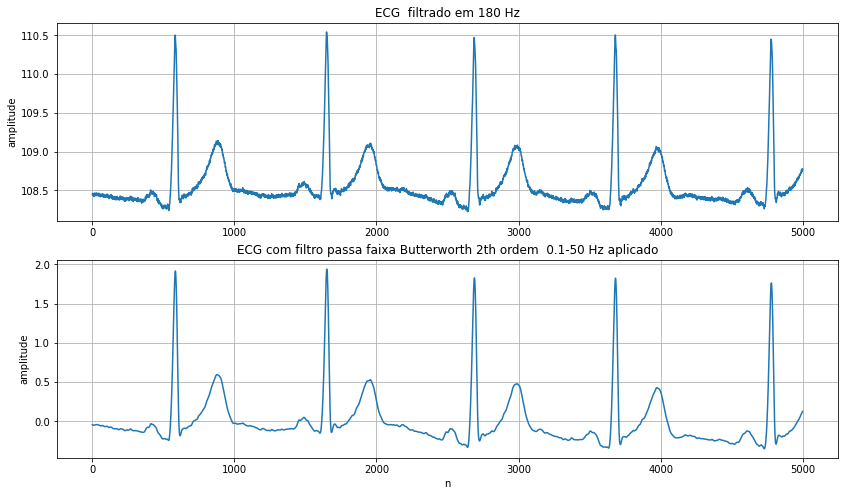

In [65]:
##############################################################
######### Aplicando o filtro passa banda de 0.1 - 50 Hz ######
##############################################################
y = signal.filtfilt(b, a, ecg_filt180hz)
#Plot do sinal filtrado em 180 Hz
f, axarr = plt.subplots(2, 1, figsize=(14, 8))
axarr[0].plot(ecg_filt180hz[100000:105000])
axarr[0].set_title('ECG  filtrado em 180 Hz')
axarr[0].set_ylabel('amplitude')
axarr[0].axis('tight')
axarr[0].grid()
#Plot do sinal filtrado passabanda entre 0.1 e 50 Hz
axarr[1].plot(y[100000:105000])
axarr[1].set_title('ECG com filtro passa faixa Butterworth 2th ordem  0.1-50 Hz aplicado')
axarr[1].set_ylabel('amplitude')
axarr[1].set_xlabel('n')
axarr[1].axis('tight')
axarr[1].grid()
plt.show()

#### Agora podemos ver que o sinal está bem limpo e as ondas de interesse continuam presentes. A seguir iremos apenas plotar os gráficos em sequência para observar melhor o progresso na aplicação dos filtros.

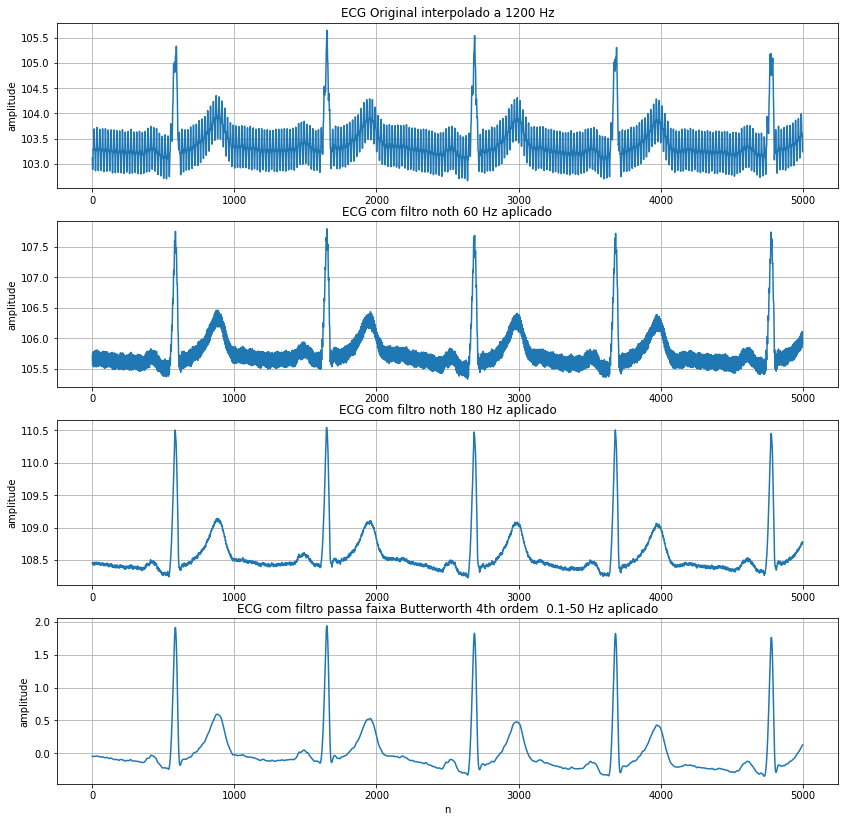

In [67]:
##############################################################
#### Plotando o sinal interpolado e os filtros aplicados #####
##############################################################
f, axarr = plt.subplots(4, 1, figsize=(14, 14))
axarr[0].plot(ecg_interp[100000:105000])
axarr[0].set_title('ECG Original interpolado a 1200 Hz')
axarr[0].set_ylabel('amplitude')
axarr[0].axis('tight')
axarr[0].grid()
# filtragem 60Hz
axarr[1].plot(ecg_filt60hz[100000:105000])
axarr[1].set_title('ECG com filtro noth 60 Hz aplicado')
axarr[1].set_ylabel('amplitude')
axarr[1].axis('tight')
axarr[1].grid()
# filtragem 180
axarr[2].plot(ecg_filt180hz[100000:105000])
axarr[2].set_title('ECG com filtro noth 180 Hz aplicado')
axarr[2].set_ylabel('amplitude')
axarr[2].axis('tight')
axarr[2].grid()
#filtragem passabanda 0.1 - 50
axarr[3].plot(y[100000:105000])
axarr[3].set_title('ECG com filtro passa faixa Butterworth 4th ordem  0.1-50 Hz aplicado')
axarr[3].set_ylabel('amplitude')
axarr[3].set_xlabel('n')
axarr[3].axis('tight')
axarr[3].grid()
plt.show()

##### Por fim podemos afirmar que a partir da resolução dos exercicios propostos foi possível compreender melhor, assim como aplicar os conceitos básicos iniciais para o tratamento de sinais biomédicos. Também foi possível entender o processamento inicial do sinal de um ECG vendo bada de frequência de interesse, assim como possíveis inteferências que presentes na aquisição do sinal, tendo essas de ser tratadas digitalmente.